In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi, log


Probabilities:  [ 0.0625  0.125   0.1875  0.25    0.1875  0.125   0.0625]
Relative Frequencies:  [ 0.0637  0.125   0.1937  0.2477  0.1841  0.1255  0.0603]


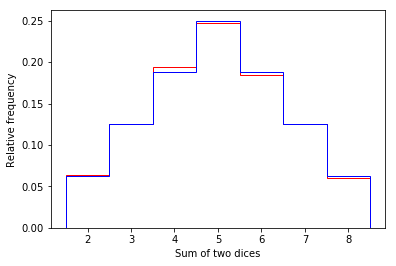

In [99]:
S = [1,2,3,4]

def sum_dice(array, size=1):
    d1 = np.random.choice(array, size=size)
    d2 = np.random.choice(array, size=size)
    return d1+d2

dice_samples = np.empty(10000)
hyp_samples = np.array([2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8])

for i in range(10000):
    dice_samples[i] = sum_dice(S)

#Computing Relative Frequencies
outcome = np.array([2,3,4,5,6,7,8])
relative_freq = np.empty(7)
hypo_prob = np.empty(7)

for n in range(7):
        relative_freq[n] = np.sum(dice_samples == n+2)/len(dice_samples)
        hypo_prob[n] = np.sum(hyp_samples == n+2)/len(hypo_sample)


print('Probabilities: ', np.array([1/16, 2/16, 3/16, 4/16, 3/16, 2/16, 1/16]))
print('Relative Frequencies: ', relative_freq)

#Plot Actual Experiment Results
_ = plt.hist(dice_samples, range=(1.5, 8.5), bins=7, histtype='step', color='red', normed=True)
_ = plt.hist(hyp_samples, range=(1.5, 8.5), bins=7, histtype='step', color='blue', normed=True)
_ = plt.xlabel('Sum of two dices')
_ = plt.ylabel('Relative frequency')

plt.show()

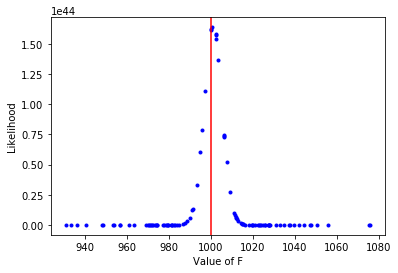

mean of F:  999.940012284
F_hat:  999.490270707


In [154]:
#np.random.seed(2)
e = np.random.normal(30, 3, 100)
F = np.random.normal(1000, e) #draw random samples with a mean of 1000 assuming Gaussian error
F_bar = np.mean(F)

#Computing Maximum Likelihood Distribution based on Frequentist Approach
likelihood_dist = np.empty(len(F))
for f in range(len(F)):
    likelihood_F = 1
    for i in range(len(F)):
        pdf = np.empty(len(F))
        pdf[i] = ((2*pi*(e[i]**2))**-0.5)*exp(-(F[i]-F[f])**2/(2*(e[i]**2)))
    for val in pdf:
        likelihood_F = likelihood_F*val
    likelihood_dist[f] = likelihood_F

result = list(zip(F, likelihood_dist))
#Plot the Result
plt.plot(F, likelihood_dist, marker='.', linestyle='none', color='blue')
plt.axvline(F_bar, linestyle='solid', color='red')
plt.xlabel("Value of F")
plt.ylabel("Likelihood")
plt.show()

w = 1/e**2
F_hat = np.sum(w*F)/np.sum(w)
sigma_F = w.sum()**(-0.5)
print("mean of F: ", F_bar)
print("F_hat: ", F_hat)